In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Διαβάζουμε τα dataframes που φτιάξαμε στα 4 analysis notebooks

In [ ]:
import pandas as pd

df_newsbeast = pd.read_csv('/content/drive/MyDrive/short_newsbeast.csv')
df_efsyn = pd.read_csv('/content/drive/MyDrive/short_efsyn.csv')
df_newsbomb = pd.read_csv('/content/drive/MyDrive/short_newsbomb.csv')
df_kathimerini = pd.read_csv('/content/drive/MyDrive/short_kathimerini.csv')

Εξάγουμε τη στήλη 'text' από το καθένα

In [ ]:
newsbeast_text = df_newsbeast['text'].str.cat(sep = ' ')
efsyn_text = df_efsyn['text'].str.cat(sep = ' ')
newsbomb_text = df_newsbomb['text'].str.cat(sep = ' ')
kathimerini_text = df_kathimerini['text'].str.cat(sep = ' ')

In [ ]:
four_sites_list = [] # make a list to put in the dictionaries that are created below

newsbeastD = {'site' : 'newsbeast.gr', 'text' : newsbeast_text} # make a dictionary for newsbeast
four_sites_list.append(newsbeastD) # add the dictionary to the list

efsynD = {'site' : 'efsyn.gr', 'text' : efsyn_text} # create a dictionary for efsyn
four_sites_list.append(efsynD) # add the dictionary to the list

newsbombD = {'site' : 'newsbomb.gr', 'text' : newsbomb_text} # create a dictionary for newsbomb
four_sites_list.append(newsbombD) # add the dictionary to the list

kathimeriniD = {'site' : 'kathimerini.gr', 'text' : kathimerini_text} # create a dictionary for kathimerini
four_sites_list.append(kathimeriniD) # add the dictionary to the list

four_sites_df = pd.DataFrame(four_sites_list) # create a dataframe from the list with the two dictionaries

In [ ]:
# !python -m spacy download el_core_news_sm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics.pairwise import cosine_similarity

nlp=spacy.load('el_core_news_sm')

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(four_sites_df['text'])
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

Παρουσιάζω το βαθμό ομοιότητας ανάμεσα στα άρθρα των 4 sites

([<matplotlib.axis.YTick at 0x7e5d2a08e680>,
 [Text(0, 0, 'newsbeast.gr'),
  Text(0, 1, 'efsyn.gr'),
  Text(0, 2, 'newsbomb.gr'),
  Text(0, 3, 'kathimerini.gr')])

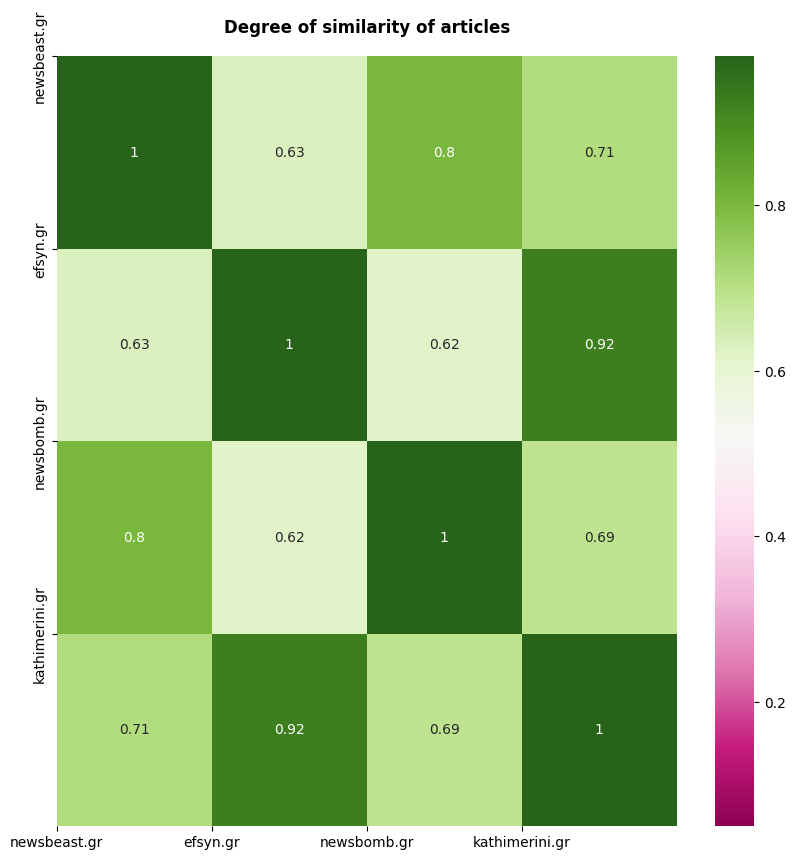

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.title('Degree of similarity of articles', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG")
plt.xticks([0, 1, 2, 3], ['newsbeast.gr', 'efsyn.gr', 'newsbomb.gr', 'kathimerini.gr'])
plt.yticks([0, 1, 2, 3], ['newsbeast.gr', 'efsyn.gr', 'newsbomb.gr', 'kathimerini.gr'])